In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# ocean_data=xr.open_dataset("/Users/loganknudsen/Documents/UMD_Research_Local_File_Saves/psi_base_test_remove_b.nc")
ocean_data=xr.open_dataset("/Users/loganknudsen/Documents/UMD_Research_Local_File_Saves/BBL_w_O_10_Ri_4_3.nc") #i=103

In [3]:
ocean_data

<xarray.Dataset>
Dimensions:  (zC: 100, zF: 101, xC: 1000, yF: 1, xF: 1000, yC: 1, time: 33)
Coordinates:
  * zC       (zC) float64 1.0 3.0 5.0 7.0 9.0 ... 191.0 193.0 195.0 197.0 199.0
  * zF       (zF) float64 0.0 2.0 4.0 6.0 8.0 ... 192.0 194.0 196.0 198.0 200.0
  * xC       (xC) float64 1.0 3.0 5.0 7.0 ... 1.995e+03 1.997e+03 1.999e+03
  * yF       (yF) float64 1.0
  * xF       (xF) float64 0.0 2.0 4.0 6.0 ... 1.994e+03 1.996e+03 1.998e+03
  * yC       (yC) float64 1.0
  * time     (time) timedelta64[ns] 0 days 00:00:00 ... 5 days 19:37:34.83223...
Data variables:
    KE       (time, zC, yC, xC) float64 ...
    V        (time, zC, yF, xC) float64 ...
    b        (time, zC, yC, xC) float64 ...
    Ri       (time, zF, yC, xC) float64 ...
    Ro       (time, zF, yF, xF) float64 ...
    B        (time, zC, yC, xC) float64 ...
    v        (time, zC, yF, xC) float64 ...
    w        (time, zF, yC, xC) float64 ...
    ε        (time, zC, yC, xC) float64 ...
    U        (time, zC, yC, xF) float64 ...
    u        (time, zC, yC, xF) float64 ...
    PV       (time, zF, yF, xF) float64 ...
Attributes:
    interval:              15707.963507194929
    Oceananigans:          This file was generated using Oceananigans v0.90.8
    Julia:                 This file was generated using Julia Version 1.9.2\...
    output time interval:  Output was saved every 4.363 hours.
    date:                  This file was generated on 2024-04-20T18:01:17.233.
    schedule:              TimeInterval

In [4]:
u = ocean_data.u+ocean_data.U
v = ocean_data.v+ocean_data.V
b = ocean_data.b + ocean_data.B
# B = ocean_data.B
w = ocean_data.w

In [18]:
f = 2*(7.292115e-5)*np.sin(np.pi/4)
v.time[19]*(f/(2*np.pi))

<xarray.DataArray 'time' ()>
array(4898488842, dtype='timedelta64[ns]')
Coordinates:
    time     timedelta64[ns] 3 days 10:54:11.306636704

In [ ]:
# ocean_data.E

In [ ]:
# vmin and vmax control colorbar range
# for i in range(len(ocean_data.time)):
# show timw -20, -25, -30, -35
q = -2
v[q].plot()
# xr.plot.contour(b[q,:,:,0],levels=20,cmap="gray")
# # plt.title("Small Pertubations w/0 Background")
# plt.show()

In [ ]:
b[0,:,0,:].dims

In [ ]:
# plt.contour(b[0])
b[0,:,0,:].mean(dim='xC').plot()#.plot.contour()

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['animation.embed_limit'] = 2**128
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, axs = plt.subplots()

frms = len(ocean_data.u.time)
def animate(t):
    plt.clf()
    ocean_data.u[t].plot(add_colorbar=True,vmin=-0.0001,vmax=0.0001,cmap='bwr') # vmin=-0.001,vmax=0.001
    # plt.contour(b[t,:,0,:],cmap="Greys")
    b[t,:,0,:].plot.contour(cmap="ocean",levels= 10)

# matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
# writervideo = matplotlib.animation.FFMpegWriter(fps=60) 
anim.save('u_base_test_PSI.gif') 
plt.close()

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['animation.embed_limit'] = 2**128
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, axs = plt.subplots()

frms = len(v.time)
def animate(t):
    plt.clf()
    ocean_data.v[t].plot(add_colorbar=True,vmin=-0.0001,vmax=0.0001,cmap='bwr') # vmin=-0.001,vmax=0.001
    # plt.contour(b[t,:,0,:],cmap="Greys")
    b[t,:,0,:].plot.contour(cmap="ocean",levels= 10)

# matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
# writervideo = matplotlib.animation.FFMpegWriter(fps=60) 
anim.save('v_base_test_PSI.gif') 
plt.close()

In [6]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['animation.embed_limit'] = 2**128
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, axs = plt.subplots()

frms = len(v.time)
def animate(t):
    plt.clf()
    ocean_data.PV[t].plot(add_colorbar=True,vmin=-1e-8,vmax=1e-8,cmap='Accent') # vmin=-0.001,vmax=0.001
    # plt.contour(b[t,:,0,:],cmap="Greys")
    b[t,:,0,:].plot.contour(cmap="ocean",levels= 10)

# matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
# writervideo = matplotlib.animation.FFMpegWriter(fps=60) 
anim.save('PV_base_test_PSI.gif') 
plt.close()

MovieWriter ffmpeg unavailable; using Pillow instead.


In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['animation.embed_limit'] = 2**128
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, axs = plt.subplots()

frms = len(v.time)
def animate(t):
    plt.clf()
    ocean_data.KE[t].plot(add_colorbar=True,vmin=0,vmax=1e-7,cmap='bwr') # vmin=-0.001,vmax=0.001
    # plt.contour(b[t,:,0,:],cmap="Greys")
    b[t,:,0,:].plot.contour(cmap="ocean",levels= 10)

matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
# anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
# # writervideo = matplotlib.animation.FFMpegWriter(fps=60) 
# anim.save('u_base_test_case_downwelling_color_change.gif') 
# plt.close()

In [7]:
KE_spatial_average_time_series = ocean_data.KE.mean(dim=['xC','yC','zC'])
KE_spatial_average_time_series

<xarray.DataArray 'KE' (time: 33)>
array([9.90314144e-09, 7.41815156e-10, 3.48343605e-10, 2.12461834e-10,
       1.49944717e-10, 1.28346294e-10, 1.15854657e-10, 1.04374355e-10,
       1.05669948e-10, 1.07189174e-10, 1.17214690e-10, 1.33577261e-10,
       1.57868890e-10, 1.92108647e-10, 2.38847417e-10, 3.02620646e-10,
       3.93943840e-10, 5.12324577e-10, 6.77577178e-10, 9.00003737e-10,
       1.19222532e-09, 1.60097763e-09, 2.13947580e-09, 2.84708425e-09,
       3.85435694e-09, 5.14399045e-09, 6.86950105e-09, 9.30997834e-09,
       1.24050519e-08, 1.66109767e-08, 2.24893858e-08, 2.99241820e-08,
       4.01862773e-08])
Coordinates:
  * time     (time) timedelta64[ns] 0 days 00:00:00 ... 5 days 19:37:34.83223...

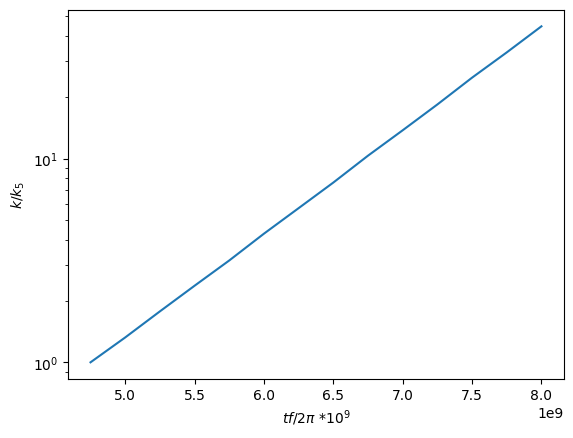

In [20]:
plt.plot(KE_spatial_average_time_series[19:].time*(1e-4)/(2*np.pi),KE_spatial_average_time_series[19:].values/KE_spatial_average_time_series.values[19])
plt.ylabel('$k$/$k_5$')
plt.xlabel('$tf$/$2\pi$ $* 10^{9}$')
plt.yscale('log')
plt.show()

In [ ]:
KE_spatial_average_time_series.differentiate("time",datetime_unit='timedelta64[ns]')

In [ ]:
eps_spatial_average_time_series = ocean_data.ε.mean(dim=['xC','yC','zC'])

In [ ]:
plt.plot(eps_spatial_average_time_series.time[50:100]*(1e-4)/(2*np.pi),eps_spatial_average_time_series.values[50:100])
plt.show()

In [ ]:
PV_spatial_average_time_series = ocean_data.PV.mean(dim=['xF','yF'])
PV_spatial_average_time_series

In [ ]:
v.zC

In [ ]:
plt.plot(u.isel(xF=500,yC=0,zC=25),v.isel(xC=500,yF=0,zC=25))
plt.gca().set_aspect('equal')

In [ ]:
Vi = 0.1
N2 = 1E-5
theta = 1E-2
f = 1E-4
s2 = N2*theta**2/f**2
gamma = (1+s2)**(-1) 
h = (f*Vi)/(gamma*N2*theta)
dVdz = gamma*N2*theta/f
u_z_average = u.mean(dim=['zC'])
v_z_average = (v+dVdz*(h-v.zC)*np.heaviside(-v.zC+110,1)-Vi).mean(dim=['zC'])
w_z_average = w.mean(dim=['zF'])
# .isel(zC=np.arange(0,55))
u_diff = (u-u_z_average).mean(dim=['xF','yC','zC'])
v_diff = (v-v_z_average+dVdz*(h-v.zC)*np.heaviside(-v.zC+110,1)-Vi).mean(dim=['xC','yF','zC'])
w_diff = (w-w_z_average).mean(dim=['xC','yC','zF'])

In [ ]:
K = 1/2 *(u_diff**2+v_diff**2+w_diff**2)

In [ ]:
plt.plot(K.time*(1e-4)/(2*np.pi),K.values/K.values[0],color="k")
# plt.plot(KE_spatial_average_time_series.time*(1e-4)/(2*np.pi),KE_spatial_average_time_series.values/K.values[0])
plt.show()

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, axs = plt.subplots()

frms = len(v.time)
def animate(t):
    plt.clf()
    PV_spatial_average_time_series[t].plot()
    plt.ylim([0,1e-9])
    # plt.contour(b[t,:,0,:],cmap="Greys")
    # b[t,:,0,:].plot.contour(cmap="Greys",levels= 10)

# anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
# # writervideo = matplotlib.animation.FFMpegWriter(fps=60) 
# anim.save('spatially_averaged_PV_standard_case_zoomed_in.gif') 
# plt.close()
matplotlib.animation.FuncAnimation(fig, animate, frames=frms)

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, axs = plt.subplots()

frms = len(v.time)
def animate(t):
    plt.clf()
    u[t].plot(add_colorbar=True,vmin=-0.001,vmax=0.001)
    # plt.contour(b[t,:,0,:],cmap="Greys")
    b[t,:,0,:].plot.contour(cmap="Greys",levels= 10)

# matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
# writervideo = matplotlib.animation.FFMpegWriter(fps=60) 
anim.save('base_test_case_downwelling_color_change.gif') 
plt.close()

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, axs = plt.subplots()

frms = len(v.time)
def animate(t):
    plt.clf()
    u[t].mean('xF').plot()
    plt.ylim([-0.01,0.01])
    # plt.contour(b[t,:,0,:],cmap="Greys")
    # b[t,:,0,:].plot.contour(cmap="Greys",levels= 10)

# anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
# # writervideo = matplotlib.animation.FFMpegWriter(fps=60) 
# anim.save('jump_p_u.gif') 
# plt.close()
matplotlib.animation.FuncAnimation(fig, animate, frames=frms)

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, axs = plt.subplots()

frms = len(v.time)
def animate(t):
    plt.clf()
    v[t].mean('xC').plot()
    plt.ylim([-0.01,0.01])
    # plt.contour(b[t,:,0,:],cmap="Greys")
    # b[t,:,0,:].plot.contour(cmap="Greys",levels= 10)

# anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
# # writervideo = matplotlib.animation.FFMpegWriter(fps=60) 
# anim.save('jump_p_v.gif') 
# plt.close()
matplotlib.animation.FuncAnimation(fig, animate, frames=frms)

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, axs = plt.subplots()

frms = len(v.time)
def animate(t):
    plt.clf()
    b[t].mean('xC').plot()
    plt.ylim([-0.0001,0.0001])
    # plt.contour(b[t,:,0,:],cmap="Greys")
    # b[t,:,0,:].plot.contour(cmap="Greys",levels= 10)

# anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
# # writervideo = matplotlib.animation.FFMpegWriter(fps=60) 
# anim.save('jump_p_b.gif') 
# plt.close()
matplotlib.animation.FuncAnimation(fig, animate, frames=frms)

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np
# plt.rcParams["animation.html"] = "jshtml"
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, ax = plt.subplots()

frms = len(v.time)
def animate(t):
    plt.clf()
    v[t].plot(add_colorbar=True,vmin=-0.0001,vmax=0.0001)
    # plt.contour(b[t,:,0,:],cmap="Greys")
    b[t,:,0,:].plot.contour(cmap="Greys",levels= 20)

anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
# writervideo = matplotlib.animation.FFMpegWriter(fps=60) 
anim.save('base_test_case_downwelling.gif') 
plt.close()

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["animation.html"] = "jshtml"
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, ax = plt.subplots()

frms = len(v.time)
def animate(t):
    plt.clf()
    cf = v[t].plot(add_colorbar=True)

matplotlib.animation.FuncAnimation(fig, animate, frames=frms)

b[1].plot()